In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [91]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

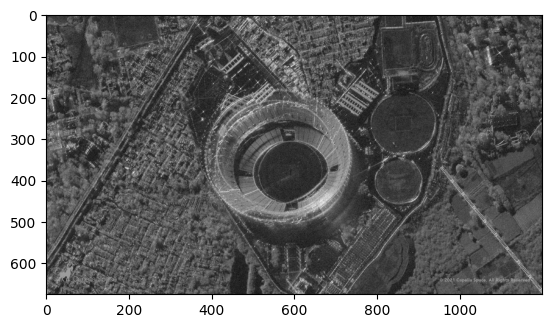

In [92]:
plt.imshow(image_gray, cmap="gray")

In [93]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[ 46, 155,   0, ...,   0,  43,   0],
       [  0,   0,   0, ...,   0,  70,   0],
       [ 11,   0, 160, ...,   0, 246,   0],
       ...,
       [  0,   0,   0, ...,   0, 115,   0],
       [  0,  97, 255, ...,  25, 129,   0],
       [  0,   0,   0, ...,   0,  74, 100]], dtype=uint8)

In [94]:
plt.imshow(noise_gauss, cmap="gray")

In [95]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [96]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [97]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

In [98]:
plt.imshow(bg_image, cmap="gray")

In [99]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

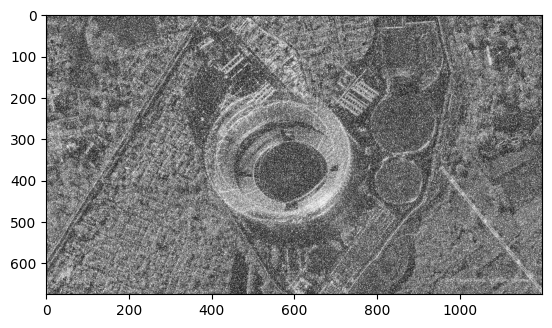

In [100]:
plt.imshow(image_noise_gauss, cmap="gray")

In [101]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4248.953254320988 0.18668928397535445


In [102]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [103]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [104]:
print(mse_gauss_median, ssim_gauss_median)

1038.8592728395063 0.4289210238098018


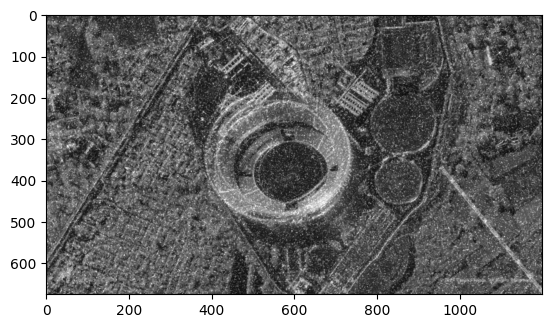

In [105]:
plt.imshow(image_gauss_median, cmap="gray")

In [106]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

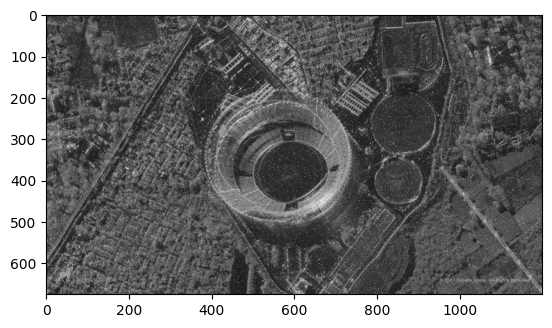

In [107]:
plt.imshow(image_sp, cmap="gray")

In [108]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

383.7481049382716 0.7236004860613912


In [109]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [110]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.72755185185186 0.8162626261426684


# Другие типы фильтров

In [111]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [112]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [113]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [114]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res

res = proc(image_noise_gauss, geom)


/tmp/ipython-input-3044326922.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


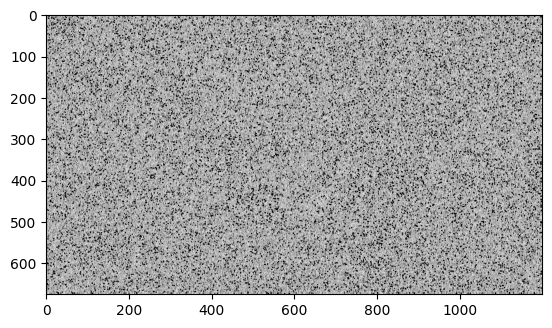

In [115]:
plt.imshow(res, cmap="gray")

In [116]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.539656790123 0.02747926419615517



# 2D свертка

In [117]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [118]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [119]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [120]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl)

In [121]:
plt.imshow(image_lapl, cmap="gray")

In [122]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

## 1. Зашумить изображение при помощи шума гаусса, постоянного шума.

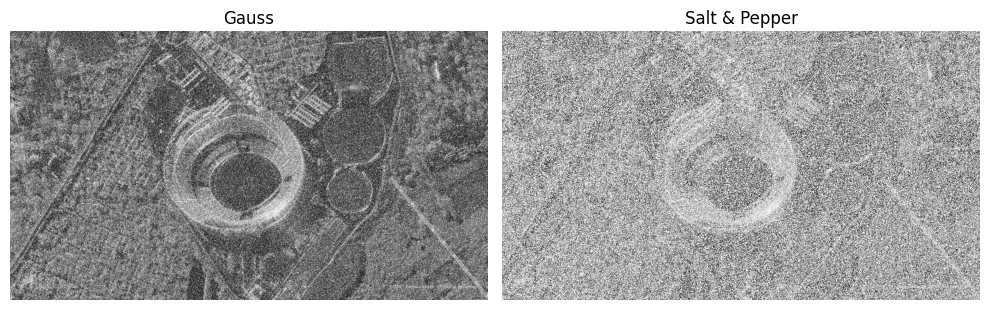

In [123]:
image = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image,noise_gauss)

noise_sp =  np.random.randint(0, 2, size=image.shape).astype(np.uint8) * 255
image_noise_sp = cv2.add(image,noise_sp)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title("Gauss")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_noise_sp, cmap='gray')
plt.title("Salt & Pepper")
plt.axis('off')
plt.tight_layout()

## 2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

Gauss noise; Median filter; PSNR = 28.422143913232635
Gauss noise; Gauss filter; PSNR = 27.510091626602673
Gauss noise; Bilateral filter; PSNR = 27.770323175544217
Gauss noise; NL Means filter; PSNR = 30.898774191923973
Salt & Pepper noise; Median filter; PSNR = 28.07279710940207
Salt & Pepper noise; Gauss filter; PSNR = 27.78829820610436
Salt & Pepper noise; Bilateral filter; PSNR = 28.27731219123681
Salt & Pepper noise; NL Means filter; PSNR = 30.608388413048402


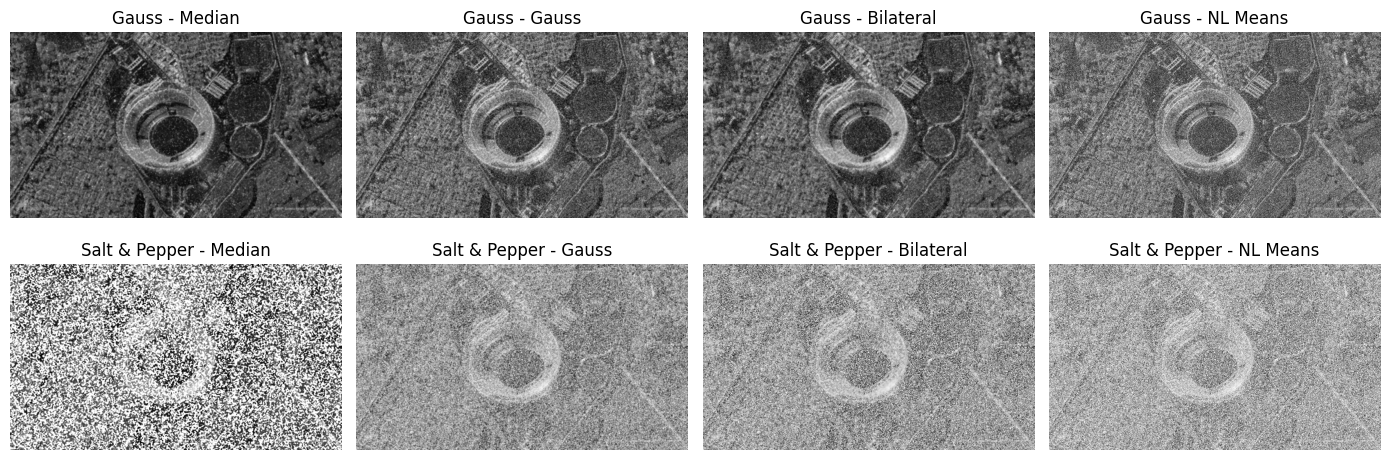

In [124]:
filters = {
    "Median": (cv2.medianBlur, (5,)),
    "Gauss": (cv2.GaussianBlur, ((5, 5), 0)),
    "Bilateral": (cv2.bilateralFilter, (9, 75, 75)),
    "NL Means": (cv2.fastNlMeansDenoising, (None, 10, 7, 21))
}

noise_images = {
    "Gauss": image_noise_gauss,
    "Salt & Pepper": image_noise_sp
}

# https://w.wiki/FnTG
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    max_pixel = 255
    return 10 * np.log10(max_pixel ** 2 / mse)

best_psnr = {"Gauss": 0, "Salt & Pepper": 0}
best_filter = {"Gauss": "", "Salt & Pepper": ""}

plt.figure(figsize=(14, 5))
i = 1

for noise_name, noise_image in noise_images.items():
    for filter_name, (filter_command, filter_params) in filters.items():
        image_filtered = filter_command(noise_image, *filter_params)

        plt.subplot(2, 4, i)
        plt.imshow(image_filtered, cmap='gray')
        plt.title(f"{noise_name} - {filter_name}")
        plt.axis('off')
        i += 1

        image_psnr = psnr(image, image_filtered)
        print(f"{noise_name} noise; {filter_name} filter; PSNR = {image_psnr}")

        if image_psnr > best_psnr[noise_name]:
            best_psnr[noise_name] = image_psnr
            best_filter[noise_name] = filter_name

plt.tight_layout()
plt.show()


## 3. Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [125]:
for noise_name in best_psnr:
    print(f"{noise_name} noise; best filter = {best_filter[noise_name]}; PSNR = {best_psnr[noise_name]}")

Gauss noise; best filter = NL Means; PSNR = 30.898774191923973
Salt & Pepper noise; best filter = NL Means; PSNR = 30.608388413048402
